# Assignment #5

In [1]:
# Packages we'll need for this assignment
import pandas as pd  # Pandas can be used to read in the data from the CSV file
import numpy as np  # Numpy is a Python math library, it can be used for resampling and associated calculations
import matplotlib.pyplot as plt # Used for plotting
from statsmodels.formula.api import ols # Used to create linear regression models
import statsmodels.api as sm # Used to create diagnostic plots

In [2]:
# Read the Excel data into a pandas dataframe

# This suppresses scientific notation when displaying float values
pd.set_option('display.float_format', lambda x: '%.9f' % x)

# Create a list of dataframes
sheets = []
with pd.ExcelFile('Assignment_5_DataSet.xlsx') as xlsx:
    sheets.append(pd.read_excel(xlsx, sheet_name='Set 1', names=['x','y']))
    sheets.append(pd.read_excel(xlsx, sheet_name='Set 2', names=['x','y']))
    sheets.append(pd.read_excel(xlsx, sheet_name='Set 3', names=['x','y']))
    sheets.append(pd.read_excel(xlsx, sheet_name='Set 4', names=['x','y']))
    sheets.append(pd.read_excel(xlsx, sheet_name='Set 5', names=['x','y']))
    sheets.append(pd.read_excel(xlsx, sheet_name='Set 6', names=['x','y']))

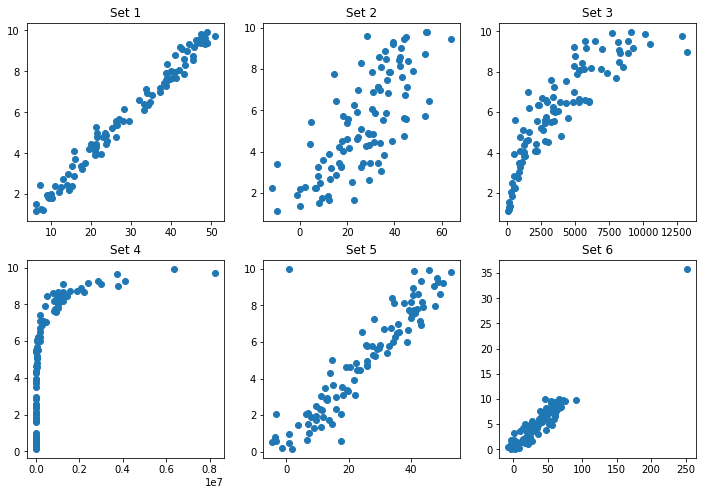

In [3]:
# Create a scatterplot for each data set and present the plots
# in a matrix
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

n = 0
for i in range(2):
    for j in range(3):
        axes[i, j].scatter(sheets[n].x, sheets[n].y)
        axes[i, j].set_title('Set ' + str(n+1))
        n += 1

plt.show()

Sets 1 and 5 depict a strong upward trend with almost all of their observations falling around, and close to, a straight line. An upward trend is definitely evident in Set 2, though not as strong as 1 and 5. Set 6 looks like it is linear as well, even if you consider its outlier. Sets 3 and 4 both tend to curve, thus I would consider them non-linear.

# Set 1

Set 1 is appears to be linear, so there is no need to apply a transformation. So we will create an OLS model:

In [4]:
model1 = ols(formula="y ~ x", data=sheets[0]).fit()
print('\nSet 1:')
print(model1.summary())


Set 1:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4579.
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           4.47e-84
Time:                        22:29:09   Log-Likelihood:                -44.348
No. Observations:                 100   AIC:                             92.70
Df Residuals:                      98   BIC:                             97.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0750      0.093      0.807 

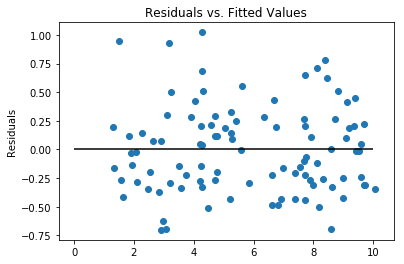

In [5]:
dfSet1 = sheets[0].copy()
dfSet1['est'] = model1.predict(dfSet1.x)
dfSet1['resid'] = dfSet1.y - dfSet1.est
plt.hlines(y=0, xmin=0, xmax=10)
plt.title('Residuals vs. Fitted Values')
plt.ylabel('Residuals')
plt.scatter(dfSet1.est, dfSet1.resid)

<ol>
<li>We can see in our scatterplot matrix that the data in Set 1 very much appears to be linear.
<li>The residuals seem to be nearly normally distributed.
<li>The variability seems relatively constant in my estimation.
<li>The observations are independent, as their residuals do not seem to convey any sort of underlying structure in the data.
</ol>
The linear assumptions for Set 1 seem to be valid.

# Set 2

In [6]:
model2 = ols(formula="y ~ x", data=sheets[1]).fit()
print('\nSet 2:')
print(model2.summary())


Set 2:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     122.4
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           6.11e-19
Time:                        22:29:09   Log-Likelihood:                -189.93
No. Observations:                 100   AIC:                             383.9
Df Residuals:                      98   BIC:                             389.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2631      0.325      6.957 

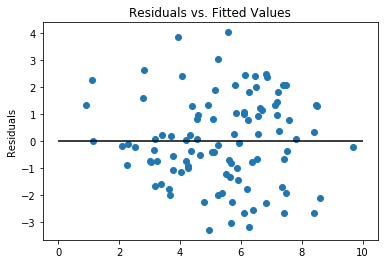

In [7]:
dfSet2 = sheets[1].copy()
dfSet2['est'] = model2.predict(dfSet2.x)
dfSet2['resid'] = dfSet2.y - dfSet2.est
plt.hlines(y=0, xmin=0, xmax=10)
plt.title('Residuals vs. Fitted Values')
plt.ylabel('Residuals')
plt.scatter(dfSet2.est, dfSet2.resid)

<ol>
<li>We can see in our scatterplot matrix that the data in Set 2 appears to have a moderate linear relationship.
<li>The residuals seem to be nearly normally distributed, with no obvious outliers.
<li>The variability seems more or less constant along the entire range.
<li>The observations are independent, as their residuals do not seem to convey any sort of underlying structure in the data.
</ol>

The linear assumptions for Set 2 seem to be valid.

# Set 3

We know from our scatterplot matrix that the plot for Set 3 is not linear, but if we apply a logarithmic transformation to both x and y for Set 3, our plot becomes linear:

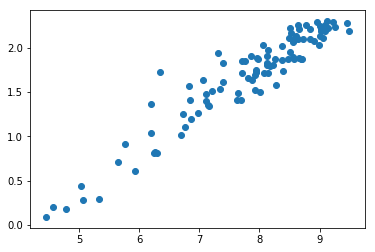

In [8]:
# Apply a logarithmic transformation to both x and y variables.
# Store the results in new columns, which we will plot
dfSet3 = sheets[2].copy()
dfSet3['logx'] = np.log(dfSet3.x)
dfSet3['logy'] = np.log(dfSet3.y)

# Plot the transformed data
plt.scatter(dfSet3.logx, dfSet3.logy)
plt.show()

# Finally, we will replace the Set 3 dataframe in the sheets list, with
# this new dataframe which contains the transformed data:
sheets[2] = dfSet3

In [9]:
model3 = ols(formula="y ~ x", data=sheets[2]).fit()
print('\nSet 3:')
print(model3.summary())


Set 3:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     302.4
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           1.04e-31
Time:                        22:29:10   Log-Likelihood:                -160.39
No. Observations:                 100   AIC:                             324.8
Df Residuals:                      98   BIC:                             330.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3088      0.197     16.817 

In [10]:
model3xfrm = ols(formula="logy ~ logx", data=sheets[2]).fit()
print('\nSet 3 Transformed:')
print(model3xfrm.summary())


Set 3 Transformed:
                            OLS Regression Results                            
Dep. Variable:                   logy   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     904.8
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           2.74e-51
Time:                        22:29:10   Log-Likelihood:                 36.795
No. Observations:                 100   AIC:                            -69.59
Df Residuals:                      98   BIC:                            -64.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7479      0.115

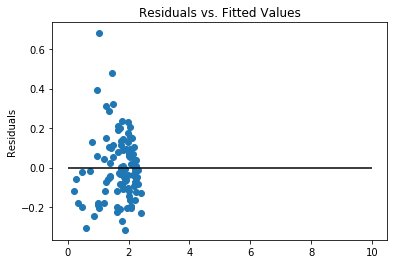

In [11]:
dfSet3xfrm = sheets[2].copy()
dfSet3xfrm['est'] = model3xfrm.predict(dfSet3xfrm.logx)
dfSet3xfrm['resid'] = dfSet3xfrm.logy - dfSet3xfrm.est
plt.hlines(y=0, xmin=0, xmax=10)
plt.title('Residuals vs. Fitted Values')
plt.ylabel('Residuals')
plt.scatter(dfSet3xfrm.est, dfSet3xfrm.resid)

The transformed set 3 data is linear, but its residuals are not normally distributed and it contains outliers. This is not an appropriate model.

If we look back at the output diagnostic charts created by the software for Set 3 and Set 3 Transformed, we can see that the slope and intercept both changed. The slope was originally almost flat (nearly 0) and it transformed to 0.44. The intercept was originally 3.31 and it transformed to -1.75.

A flat slope implies no linear relationship between the variables, so the significant increase in slope tells us that the transformed line likely estimates more linear data, which was the goal of the transformation.

If the model was linear, we would expect the dependent variable y to be -1.75 when the dependent variable, x, is 0. However, the transformed data is clearly not linear, so it should be discarded, and we should revert to the original, non-linear, Set 3.

# Set 4
We can see in our scatterplot matrix that the data in Set 4 curves and is not well suited to a linear model. No further checking required. But if we apply a logarithmic transformation to just x, then the plot becomes linear:

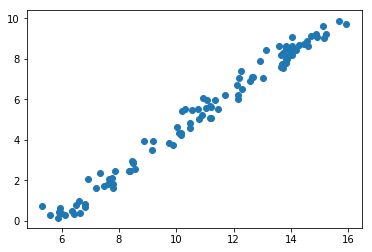

In [12]:
# Apply a logarithmic transformation to just the x variable.
# Store the results in a new column, which we will plot against y
dfSet4 = sheets[3].copy()
dfSet4['logx'] = np.log(dfSet4.x)

# Plot the transformed data
plt.scatter(dfSet4.logx, dfSet4.y)
plt.show()

# Finally, we will replace the Set 4 dataframe in the sheets list, with
# this new dataframe which contains the transformed data:
sheets[3] = dfSet4

In [13]:
model4 = ols(formula="y ~ x", data=sheets[3]).fit()
print('\nSet 4:')
print(model4.summary())


Set 4:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     59.97
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           8.87e-12
Time:                        22:29:11   Log-Likelihood:                -226.91
No. Observations:                 100   AIC:                             457.8
Df Residuals:                      98   BIC:                             463.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3001      0.265     16.226 

In [14]:
model4xfrm = ols(formula="y ~ logx", data=sheets[3]).fit()
print('\nSet 4 Transformed:')
print(model4xfrm.summary())


Set 4 Transformed:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5765.
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           6.91e-89
Time:                        22:29:11   Log-Likelihood:                -46.212
No. Observations:                 100   AIC:                             96.42
Df Residuals:                      98   BIC:                             101.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5398      0.147

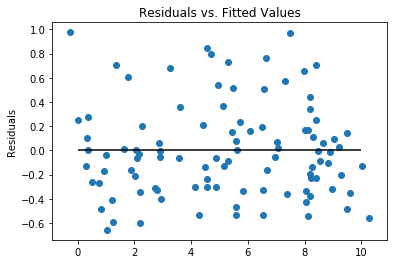

In [15]:
dfSet4xfrm = sheets[3].copy()
dfSet4xfrm['est'] = model4xfrm.predict(dfSet4xfrm.logx)
dfSet4xfrm['resid'] = dfSet4xfrm.y - dfSet4xfrm.est
plt.hlines(y=0, xmin=0, xmax=10)
plt.title('Residuals vs. Fitted Values')
plt.ylabel('Residuals')
plt.scatter(dfSet4xfrm.est, dfSet4xfrm.resid)

The transformed set 4 data is linear, it has nearly normally distributed residuals with constant variability and its observations seem independent. This is a reasonable model.

If we look back at the output diagnostic charts created by the software for Set 4 and Set 4 Transformed, we can see that the slope and intercept both changed. The slope was originally almost flat (nearly 0) and it transformed to 0.99. The intercept was originally 4.3 and it transformed to -5.5.

A flat slope implies no linear relationship between the variables, so the significant increase in slope tells us that the transformed line likely estimates more linear data, which was the goal of the transformation.

Since the model IS linear, we expect the dependent variable y to be -5.5 when the dependent variable, x, is 0.

# Set 5

In [16]:
model5 = ols(formula="y ~ x", data=sheets[4]).fit()
print('\nSet 5:')
print(model5.summary())


Set 5:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     411.9
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           4.70e-37
Time:                        22:29:11   Log-Likelihood:                -165.80
No. Observations:                 101   AIC:                             335.6
Df Residuals:                      99   BIC:                             340.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8084      0.241      3.359 

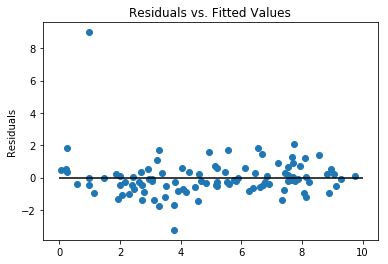

In [17]:
dfSet5 = sheets[4].copy()
dfSet5['est'] = model5.predict(dfSet5.x)
dfSet5['resid'] = dfSet5.y - dfSet5.est
plt.hlines(y=0, xmin=0, xmax=10)
plt.title('Residuals vs. Fitted Values')
plt.ylabel('Residuals')
plt.scatter(dfSet5.est, dfSet5.resid)

<ul>
<li>We can see in our scatterplot matrix that the data in Set 5 is linear, however has one notable outlier.
<li>There is a notable outlier in the residuals, which implies that a linear model is not appropriate.
</ul>

Let's drop the outlier, create a new model and compare:

In [18]:
# The outlier is the last observation, so we can remove it positionally
dfSet5NoOut = sheets[4].copy()
dfSet5NoOut = dfSet5NoOut.head(100)

model5noout = ols(formula="y ~ x", data=dfSet5NoOut).fit()
print('\nSet 5 - Outlier Removed')
print(model5noout.summary())


Set 5 - Outlier Removed
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     945.8
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           3.84e-52
Time:                        22:29:12   Log-Likelihood:                -126.85
No. Observations:                 100   AIC:                             257.7
Df Residuals:                      98   BIC:                             262.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4802      

Our R-squared value increased and our intercept dropped in half by dropping the outlier, so that implies that the outlier did have leverage, though slope was relatively unchanged. We can also see that the observation is in a position of high leverage by observing that the value of x (~1.0) is far from the mean (~25.0).

# Set 6

In [19]:
model6 = ols(formula="y ~ x", data=sheets[5]).fit()
print('\nSet 6:')
print(model6.summary())


Set 6:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1041.
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           2.49e-54
Time:                        22:29:12   Log-Likelihood:                -166.00
No. Observations:                 101   AIC:                             336.0
Df Residuals:                      99   BIC:                             341.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5279      0.202      2.615 

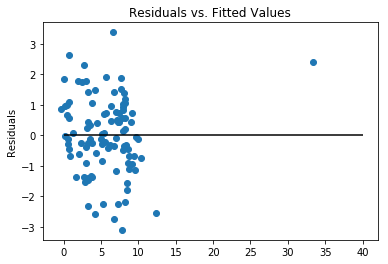

In [20]:
dfSet6 = sheets[5].copy()
dfSet6['est'] = model6.predict(dfSet6.x)
dfSet6['resid'] = dfSet6.y - dfSet6.est
plt.hlines(y=0, xmin=0, xmax=40)
plt.title('Residuals vs. Fitted Values')
plt.ylabel('Residuals')
plt.scatter(dfSet6.est, dfSet6.resid)

<ul>
<li>We can see in our scatterplot matrix that the data in Set 6 is linear, however it has one notable outlier. That outlier looks like it would land quite close, or directly on, the fit line however, so it may not be of concern.
<li>There is a notable outlier in the residuals, which also implies that a linear model is not appropriate.
</ul>

In [21]:
# The outlier is the last observation, so we can remove it positionally
dfSet6NoOut = sheets[5].copy()
dfSet6NoOut = dfSet6NoOut.head(100)

model6noout = ols(formula="y ~ x", data=dfSet6NoOut).fit()
print('\nSet 6 - Outlier Removed')
print(model5noout.summary())


Set 6 - Outlier Removed
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     945.8
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           3.84e-52
Time:                        22:29:12   Log-Likelihood:                -126.85
No. Observations:                 100   AIC:                             257.7
Df Residuals:                      98   BIC:                             262.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4802      

In this case our R-sqaured value actually dropped! Slope increased and intercept decreased. So less variability is now explained by our model, which isn't ideal. But the value of x (~252) is far from the average value of x (~39)

# Set 2 - 0-intercept

In [22]:
dfSet2 = sheets[1].copy()

# Leaving intercept as-is
modelSet2 = ols(formula="y ~ x", data=dfSet2).fit()
print(modelSet2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     122.4
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           6.11e-19
Time:                        22:29:12   Log-Likelihood:                -189.93
No. Observations:                 100   AIC:                             383.9
Df Residuals:                      98   BIC:                             389.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2631      0.325      6.957      0.0

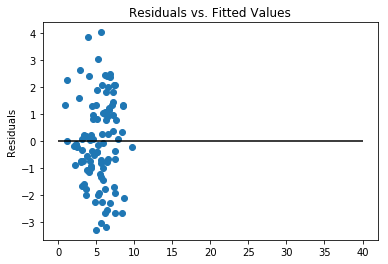

In [23]:
# Plot the residuals
dfSet2['est'] = modelSet2.predict(dfSet2.x)
dfSet2['resid'] = dfSet2.y - dfSet2.est
plt.hlines(y=0, xmin=0, xmax=40)
plt.title('Residuals vs. Fitted Values')
plt.ylabel('Residuals')
plt.scatter(dfSet2.est, dfSet2.resid)

In [24]:
# Now lets force a 0 intercept
dfSet2_0int = dfSet2.copy()

# Leaving intercept as-is
model0int = ols(formula="y ~ x - 1", data=dfSet2_0int).fit()
print(model0int.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     782.6
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           8.34e-49
Time:                        22:29:13   Log-Likelihood:                -210.00
No. Observations:                 100   AIC:                             422.0
Df Residuals:                      99   BIC:                             424.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.1795      0.006     27.975      0.0

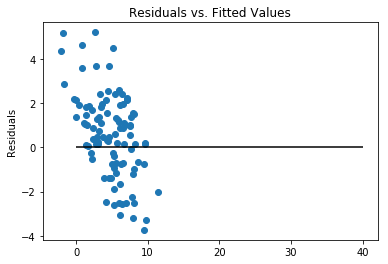

In [25]:
# Plot the residuals
dfSet2_0int['est'] = model0int.predict(dfSet2_0int.x)
dfSet2_0int['resid'] = dfSet2_0int.y - dfSet2_0int.est
plt.hlines(y=0, xmin=0, xmax=40)
plt.title('Residuals vs. Fitted Values')
plt.ylabel('Residuals')
plt.scatter(dfSet2_0int.est, dfSet2_0int.resid)

It's a tough call as to which is better, the model with the intercept or the model without. The R-squared value is much better without the intercept, so that model explains more of the variability. But the residuals for the intercept model appear more normally distributed and the variability is more constant. I think I would lean towards the model with the intercept as being the better model.